<a href="https://colab.research.google.com/github/Niger49/CSE3210_DSP/blob/main/CSE_3210_(LAB)_Assignment_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

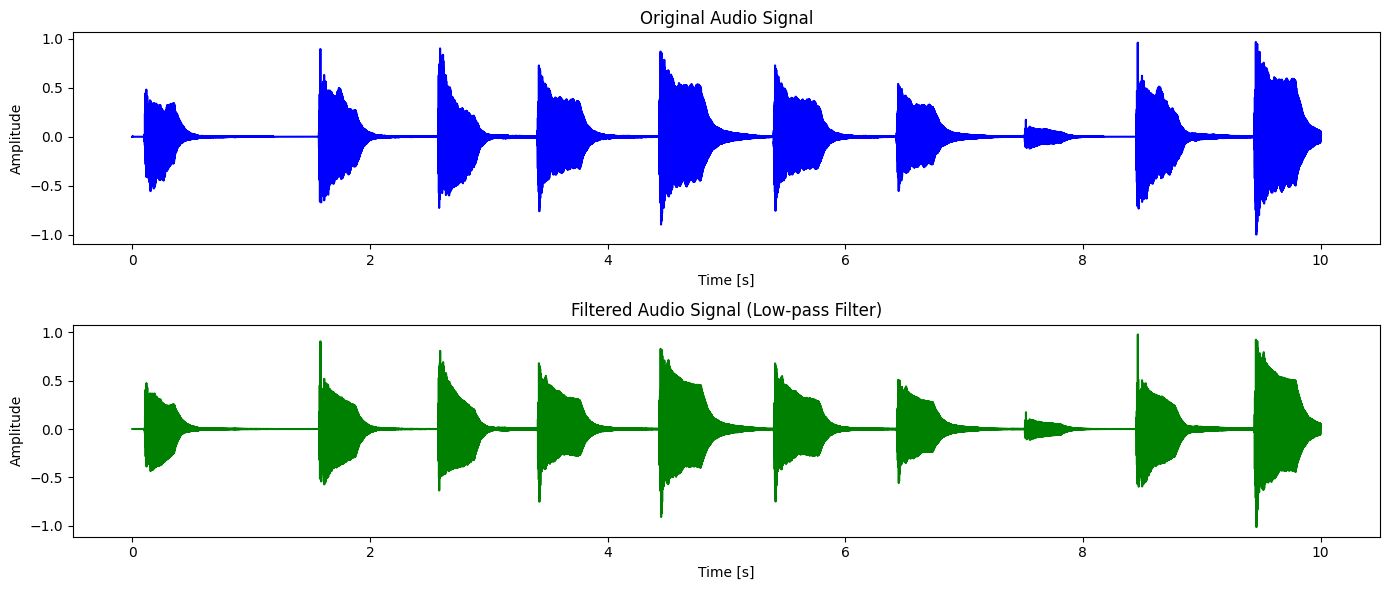

In [ ]:
!pip install scipy matplotlib requests

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import requests
import io

audio_link = "https://github.com/Niger49/CSE3210_DSP/raw/refs/heads/main/522869__sarafg11__piano7_ex2_bad_bad.wav"

response = requests.get(audio_link)
audio_bytes = io.BytesIO(response.content)
sample_rate, AudioData = wavfile.read(audio_bytes)

if len(AudioData.shape) > 1:
    AudioData = AudioData[:, 0]

duration_seconds = 10
samples = sample_rate * duration_seconds
data_trimmed = AudioData[:samples]

data_trimmed = data_trimmed / np.max(np.abs(data_trimmed))

def butter_low_pass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass_filter(signal, cutoff=1000, fs=44100, order=5):
    b, a = butter_low_pass(cutoff, fs, order)
    return lfilter(b, a, signal)

filtered_signal = apply_lowpass_filter(data_trimmed, cutoff=1000, fs=sample_rate)

time_axis = np.linspace(0, duration_seconds, len(data_trimmed))

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(time_axis, data_trimmed, color='blue')
plt.title("Original Audio Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(time_axis, filtered_signal, color='green')
plt.title("Filtered Audio Signal (Low-pass Filter)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()